In [27]:
import pandas as pd
import numpy as np
import sys
import os

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sys.path.append("..")
from utils.functions import flatten

from reports import report_to_apiseq

In [28]:
REPORT_FOLDER = "/data/quo.vadis/modules/morbus.certatio/emulation/report_ransomware/"
report_files = os.listdir(REPORT_FOLDER)
df = pd.DataFrame([report_to_apiseq(REPORT_FOLDER + file) for file in report_files])


In [29]:
print(df.shape)
df.head()

(472, 3)


,sha256,api.seq,api.seq.len
0,9561c80c2638c20deaa2d101d6997cd7b91db9a4277729...,"[user32.GetFocus, user32.GetFocus]",2
1,3b969010058e16982fb4aa22ee0babf29bbb6b6608cc51...,"[kernel32.GetVolumeInformation, kernel32.GetVe...",180
2,f3e1570d8447ab89e6b7341acfee122152181f7bca7f23...,"[user32.GetClipboardSequenceNumber, kernel32.G...",2
3,24c3804ea876f04eb4e456d9441ddbc1b01221e2258785...,"[kernel32.GetVolumeInformation, kernel32.GetVe...",191
4,a17ba624dde55567623ffb0bf9c8a0eb4b381f26c70a24...,"[kernel32.GetVolumeInformation, kernel32.GetVe...",180


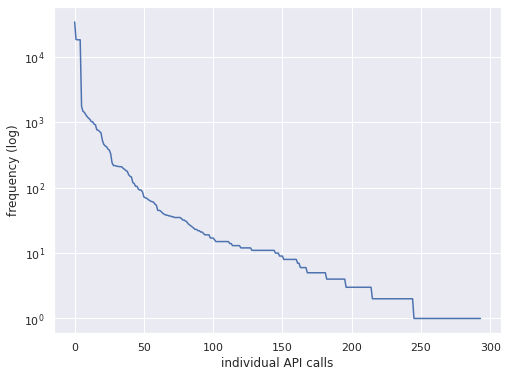

In [6]:
api_counter = Counter(list(flatten(df["api.seq"].values)))

plt.figure(figsize=(8,6))
plt.plot([x[1] for x in api_counter.most_common()])
plt.ylabel("frequency (log)")
plt.xlabel("individual API calls")
plt.yscale("log")

In [7]:
api_counter.most_common(15)

[('kernel32.GetProcAddress', 34179),
 ('KERNEL32.GetCPInfoExW', 18442),
 ('KERNEL32.InitAtomTable', 18252),
 ('USER32.DdeClientTransaction', 18252),
 ('KERNEL32.GetQueuedCompletionStatus', 18252),
 ('KERNEL32.TlsGetValue', 1744),
 ('kernel32.VirtualAlloc', 1474),
 ('MSVCRT._beginthreadex', 1419),
 ('kernel32.LoadLibraryA', 1311),
 ('kernel32.FlsGetValue', 1223),
 ('KERNEL32.CloseHandle', 1158),
 ('KERNEL32.GetTickCount', 1111),
 ('KERNEL32.GetProcAddress', 1022),
 ('kernel32.InitializeCriticalSectionEx', 1019),
 ('MSVCRT.memcmp', 938)]

In [8]:
lengths = df["api.seq.len"].value_counts().sort_index()
lengths[500] = lengths[lengths.index >= 500].sum()
lengths = lengths[lengths.index <= 500]

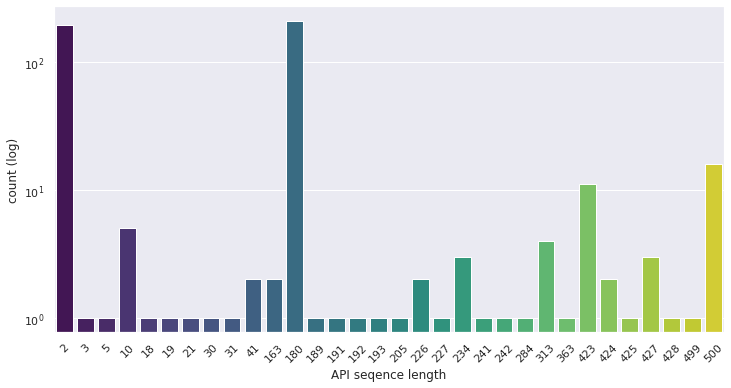

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(x=lengths.index, y=lengths.values, palette="viridis")
plt.yscale("log")
plt.ylabel("count (log)")
plt.xticks(rotation=45)
_ = plt.xlabel("API seqence length")

In [10]:
def get_perc(dff,l):
    print(f"Percentage of paths under {l} is: {(dff['api.seq.len'] < l).sum()*100/dff.shape[0]:.2f}")

get_perc(df, 200)
get_perc(df, 50)
get_perc(df, 5)

Percentage of paths under 200 is: 89.41
Percentage of paths under 50 is: 44.07
Percentage of paths under 5 is: 41.31


In [15]:
twoapi = df[df["api.seq.len"] == 2].reset_index(drop=True)
twoapi.tail()

,sha256,api.seq,api.seq.len
189,495d01636159b88a77d69a08536161d0be6faea5e3f4da...,"[kernel32.GetUserDefaultUILanguage, kernel32.G...",2
190,ecd3f70179c31fa152422c61f2cb1a6db04b117592ea7a...,"[kernel32.GetProcessHeap, kernel32.GetProcessH...",2
191,ead58cd978f07fa7db43ac5f839f547a885e85bd460758...,"[kernel32.GetCommandLineW, user32.GetCaretBlin...",2
192,1310c7fe0f4555b8929b7783b606d0f7766af0ec0857eb...,"[user32.GetMenuCheckMarkDimensions, user32.Get...",2
193,c89dc167ddb4efff0b06a7f7722451b6d5f165ef55b0fb...,"[kernel32.GetUserDefaultUILanguage, kernel32.G...",2


In [20]:
# most common last API in 2 API sequence
Counter(list(flatten(twoapi["api.seq"].apply(lambda x: x[1]).values))).most_common(10)

[('kernel32.GetUserDefaultUILanguage', 13),
 ('kernel32.GetConsoleWindow', 12),
 ('user32.GetMessageExtraInfo', 9),
 ('user32.GetCaretBlinkTime', 9),
 ('user32.GetFocus', 8),
 ('user32.GetClipboardViewer', 7),
 ('user32.GetCursor', 7),
 ('user32.GetClipboardSequenceNumber', 7),
 ('user32.GetOpenClipboardWindow', 7),
 ('kernel32.GetProcessHeap', 7)]